<a href="https://colab.research.google.com/github/Untick/Marketplaces/blob/Koybagarov-Kairat-branch/KairatRegres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #Библиотека работы с массивами
import pandas as pd # Библиотека для работы с базами

from tensorflow.keras.models import Sequential, Model #
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten #
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop #
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence #
from tensorflow.keras.preprocessing.sequence import pad_sequences #
from tensorflow.keras.callbacks import LambdaCallback # подключаем колбэки

from sklearn.preprocessing import StandardScaler #
from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #
#from google.colab import files #Для загрузки своей картинки

import random #Для генерации случайных чисел
import math # Для округления
#import os #Для работы с файлами
import re #
import matplotlib.pyplot as plt #
%matplotlib inline

from IPython.display import clear_output

In [ ]:
from google.colab import drive # Подключаем диск
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
file_name = "/content/drive/MyDrive/Базы/Графики_01.06.2022-31.05.2023.csv"
df = pd.read_csv(file_name,sep=';', encoding='cp1251') #Загружаем данные в data frame
#data = df.values #Вытаскиваем данные в numpy array

<ipython-input-17-5b6c607d3f0c>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name,sep=';', encoding='cp1251') #Загружаем данные в data frame


In [18]:
df.head(6) #Показываем пример данных (первые 6 колонок)
#df.shape

,Категория 3-го уровня,Товары,Модель,Ozon ID,Артикул,День,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,Позиция в поиске и каталоге,"В корзину, всего",Заказано товаров,Отменено товаров,Доставлено (за выбранный период),Возвращено товаров,Заказано на сумму,"Отправления с премиум-подпиской, принятые в обработку"
0,"Автохимия - Герметик, клей","Черный герметик для стекол фар (4,5 метра)","Черный герметик для стекол фар (4,5 метра)",650524620,237,22/07/2022,4,1,5,2,3,"34,67",0,0,0,0,0,0,0
1,"Автохимия - Герметик, клей","Черный герметик для стекол фар (4,5 метра)","Черный герметик для стекол фар (4,5 метра)",650524620,237,23/07/2022,15,1,17,1,14,"36,64",0,0,0,0,0,0,0
2,"Автохимия - Герметик, клей","Черный герметик для стекол фар (4,5 метра)","Черный герметик для стекол фар (4,5 метра)",650524620,237,24/07/2022,21,1,29,2,20,"177,70",2,0,0,0,0,0,0
3,"Автохимия - Герметик, клей","Черный герметик для стекол фар (4,5 метра)","Черный герметик для стекол фар (4,5 метра)",650524620,237,25/07/2022,32,1,42,1,31,"47,45",1,1,0,0,0,1000,0
4,"Автохимия - Герметик, клей","Черный герметик для стекол фар (4,5 метра)","Черный герметик для стекол фар (4,5 метра)",650524620,237,26/07/2022,54,2,86,6,47,"40,91",2,1,0,0,0,990,0
5,"Автохимия - Герметик, клей","Черный герметик для стекол фар (4,5 метра)","Черный герметик для стекол фар (4,5 метра)",650524620,237,27/07/2022,99,1,127,3,92,"46,66",2,0,0,0,0,0,0


In [19]:
file_name = "/content/drive/MyDrive/Базы/Аналитика Графики2023.xlsx"   #  Загрузка 2 файла
df2 = pd.read_excel(file_name) #Загружаем данные в data frame


In [20]:
df2.head(6) #Показываем пример данных (первые 6 колонок)


,Категория 3-го уровня,Товары,Модель,Ozon ID,Артикул,День,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,Позиция в поиске и каталоге,"В корзину, всего",Заказано товаров,Отменено товаров,Доставлено (за выбранный период),Возвращено товаров,Заказано на сумму,"Отправления с премиум-подпиской, принятые в обработку"
0,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353426,34414,2023-03-03,1,1,6,1,4,"1,00",0,0,0,0,0,0,0
1,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353426,34414,2023-03-05,1,0,2,0,2,"1,00",0,0,0,0,0,0,0
2,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,2023-03-05,65,3,69,3,40,"110,33",0,0,0,0,0,0,0
3,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,2023-03-06,85,3,109,3,46,"103,43",0,0,0,0,0,0,0
4,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,2023-03-07,44,2,50,2,37,"97,14",0,0,0,0,0,0,0
5,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,2023-03-08,47,1,54,2,47,"115,06",0,0,0,0,0,0,0


In [21]:
df = df.append(df2, ignore_index=True)

<ipython-input-21-857001483f3e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


In [22]:
df.shape


(509496, 19)

In [23]:
df.drop(df.columns[[1,2,3,4,5]], axis=1, inplace=True)  # Удаляем Товары	Модель	Ozon ID	Артикул	День

In [24]:
df.head(6) #Показываем пример данных (первые 6 колонок)

,Категория 3-го уровня,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,Позиция в поиске и каталоге,"В корзину, всего",Заказано товаров,Отменено товаров,Доставлено (за выбранный период),Возвращено товаров,Заказано на сумму,"Отправления с премиум-подпиской, принятые в обработку"
0,"Автохимия - Герметик, клей",4,1,5,2,3,"34,67",0,0,0,0,0,0,0
1,"Автохимия - Герметик, клей",15,1,17,1,14,"36,64",0,0,0,0,0,0,0
2,"Автохимия - Герметик, клей",21,1,29,2,20,"177,70",2,0,0,0,0,0,0
3,"Автохимия - Герметик, клей",32,1,42,1,31,"47,45",1,1,0,0,0,1000,0
4,"Автохимия - Герметик, клей",54,2,86,6,47,"40,91",2,1,0,0,0,990,0
5,"Автохимия - Герметик, клей",99,1,127,3,92,"46,66",2,0,0,0,0,0,0


In [25]:
# Настройка номеров столбцов
# Дальнейшие вычисления не будут зависеть от порядка столбцов в таблице

COL_CATEGORY = df.columns.get_loc('Категория 3-го уровня')
COL_Unik_Visit = df.columns.get_loc('Уникальные посетители, всего')
COL_Unik_See         = df.columns.get_loc('Уникальные посетители с просмотром карточки товара')
COL_Show         = df.columns.get_loc('Показы, всего')
COL_Show_Card         = df.columns.get_loc('Показы на карточке товара')
COL_Show_Find         = df.columns.get_loc('Показы в поиске и каталоге')
COL_Pos_Find         = df.columns.get_loc('Позиция в поиске и каталоге')
COL_Basket         = df.columns.get_loc('В корзину, всего')
COL_Cancel_Goods   = df.columns.get_loc('Отменено товаров')
COL_Delivered   = df.columns.get_loc('Доставлено (за выбранный период)')
COL_Return_Goods         = df.columns.get_loc('Возвращено товаров')
COL_Order_Sum         = df.columns.get_loc('Заказано на сумму')
COL_Premium         = df.columns.get_loc('Отправления с премиум-подпиской, принятые в обработку')

COL_Goods_Ordered  = df.columns.get_loc('Заказано товаров')   #   Y  прогнозируемый столбец


**Прогнозирование по категориям, так что убираем лишние столбцы**


In [26]:
list_cat = df['Категория 3-го уровня'].unique()
print(list_cat)
print(len(list_cat))

['Автохимия - Герметик, клей' 'Другое' 'Комплектующие для ксеноновых фар'
 'Комплектующие светодиодной лампы для авто' 'Лампа автомобильная'
 'Противотуманные фары' 'Разное автопринадлежности' 'Светодиодный модуль'
 'Фара автомобильная' 'Фонарь задний для авто']
10


In [37]:
# Преобразование категорию в one hot encoding

def category_to_ohe(arg):
    class_list = list_cat
    # Определение размерности выходного вектора
    num_classes = len(list_cat)

    # Поиск верного интервала для входного значения
    for i in range(num_classes - 1):
        if arg == class_list[i]:
            cls = i                       # категория найдена - назначение класса
            break
    else:                                 # Внимание: for/else
        cls = num_classes - 1             # категория не найдена - последний класс

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)

In [38]:
category_to_ohe("Другое")

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
#  Извлечение позиции в поиске и в каталоге
def extract_pozition(arg):
  return int(arg.split(',')[0]), int(arg.split(',')[1])

In [30]:
extract_pozition("100,05")

(100, 5)

In [45]:
df.shape

(509496, 14)

In [49]:
def extract_row_data(row):

    # Извлечение и преобразование данных
    cat = category_to_ohe(row[COL_CATEGORY])      # Категория
    unik_visit = np.array([row[COL_Unik_Visit]])
    col_unik_see = np.array([row[COL_Unik_See]]) #Уникальные посетители с просмотром карточки товара
    col_show = np.array([row[COL_Show]])          #Показы, всего
    col_show_card = np.array([row[COL_Show_Card]])  #Показы на карточке товара
    col_show_find = np.array([row[COL_Show_Find ]]) #Показы в поиске и каталоге
    find, pos = extract_pozition(row[COL_Pos_Find]) #Позиция в поиске и каталоге
    find = np.array([find])
    pos = np.array([pos])
    col_basket = np.array([row[COL_Basket]])  #В корзину, всего
    col_cancel_goods = np.array([row[COL_Cancel_Goods]])  #Отменено товаров
    col_delivered = np.array([row[COL_Delivered]])     #Доставлено (за выбранный период)
    col_return_goods = np.array([row[COL_Return_Goods]])  #Возвращено товаров

    order = np.array([row[COL_Order_Sum]])      # Заказано на сумму

    # Объединение всех входных данных в один общий вектор
    x_data = np.hstack([cat,
                        unik_visit,
                        col_unik_see,
                        col_show,
                        col_show_card,
                        col_show_find,
                        find,
                        pos,
                        col_basket,
                        col_cancel_goods,
                        col_delivered,
                        col_return_goods
                        ])

    # Возврат входных данных и выходных (зарплаты)
    return x_data, order


# Создание общей выборки
def construct_train_data(row_list):
    x_data = []
    y_data = []

    for row in row_list:
        x, y = extract_row_data(row)
        if y[0] > 0:                      #
            x_data.append(x)
            y_data.append(y)

    return np.array(x_data), np.array(y_data)

In [50]:
# Формирование выборки из загруженного набора данных
x_train_01, y_train = construct_train_data(df.values)

In [51]:
# Форма наборов параметров и зарплат
print(x_train_01.shape)
print(y_train.shape)

# Пример обработанных данных
n = 0
print(x_train_01[n])
print(y_train[n])

(13902, 21)
(13902, 1)
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0. 32.  1. 42.  1. 31. 47. 45.  1.
  0.  0.  0.]
[1000]


**Функция отрисовки графика истории обучения**

In [52]:
def plot_history(history):
    plt.plot(history.history['mae'],
            label='Средняя абсолютная ошибка на обучающем наборе')
    plt.plot(history.history['val_mae'],
            label='Средняя абсолютная ошибка на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Средняя абсолютная ошибка')
    plt.legend()
    plt.show()

**
Создадим и обучим нейронную сеть, обрабатывающую сформированную выборку:**

Epoch 1/50
47/47 [==============================] - 2s 20ms/step - loss: 38405748.0000 - mae: 4239.9819 - val_loss: 110411120.0000 - val_mae: 6101.9712
Epoch 2/50
47/47 [==============================] - 1s 15ms/step - loss: 38401848.0000 - mae: 4239.5850 - val_loss: 110402272.0000 - val_mae: 6101.5137
Epoch 3/50
47/47 [==============================] - 1s 16ms/step - loss: 38397444.0000 - mae: 4239.1387 - val_loss: 110392280.0000 - val_mae: 6100.9409
Epoch 4/50
47/47 [==============================] - 1s 15ms/step - loss: 38392436.0000 - mae: 4238.6211 - val_loss: 110380680.0000 - val_mae: 6100.2212
Epoch 5/50
47/47 [==============================] - 1s 14ms/step - loss: 38386552.0000 - mae: 4238.0122 - val_loss: 110366024.0000 - val_mae: 6099.3057
Epoch 6/50
47/47 [==============================] - 1s 14ms/step - loss: 38379824.0000 - mae: 4237.3091 - val_loss: 110348264.0000 - val_mae: 6098.2012
Epoch 7/50
47/47 [==============================] - 1s 15ms/step - loss: 38372072.0000 -

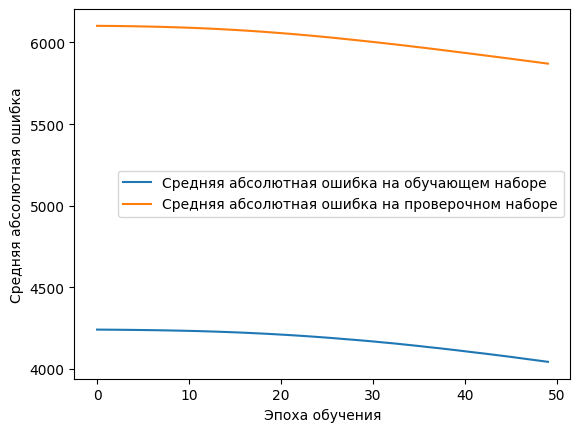

In [53]:
# Обучение модели на простых данных

model_simple = Sequential()
model_simple.add(BatchNormalization(input_dim=x_train_01.shape[1]))
model_simple.add(Dense(128, activation='relu'))
model_simple.add(Dense(1000, activation='tanh'))
model_simple.add(Dense(100, activation='relu'))
model_simple.add(Dense(1, activation='linear'))

model_simple.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])

history = model_simple.fit(x_train_01,
                    y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.15,
                    verbose=1)

plot_history(history)

**На следующем шаге мы нормализуем значение заказано товаров, которое предсказывает нейронная сеть**

In [54]:
# Для нормализации данных используется готовый инструмент
y_scaler = StandardScaler()

# Нормализация выходных данных по стандартному нормальному распределению
y_train_scaled = y_scaler.fit_transform(y_train)

Воспользуемся для этого стандартным инструментом библиотеки sklearn - StandardScaler'ом, с помощью которого сможем преобразовать наши данные к нормальному распределению

In [56]:
# Проверка нормализации
print(y_train_scaled.shape)
print(f'Оригинальное значение заказано:  {y_train[1, 0]}')
print(f'Нормированное значение заказано: {y_train_scaled[1, 0]}')

# Вывод границ ненормализованных и нормализованных данных
print(y_train.mean(), y_train.std())
print(y_train_scaled.mean(), y_train_scaled.std())

(13902, 1)
Оригинальное значение заказано:  990
Нормированное значение заказано: -0.6578491050416401
4519.563516040857 5365.308683998963
4.0888662682209765e-18 1.0


Epoch 1/50
47/47 [==============================] - 2s 29ms/step - loss: 0.6879 - mae: 0.4708 - val_loss: 2.0975 - val_mae: 0.7296
Epoch 2/50
47/47 [==============================] - 1s 26ms/step - loss: 0.6014 - mae: 0.4318 - val_loss: 1.8845 - val_mae: 0.7221
Epoch 3/50
47/47 [==============================] - 1s 25ms/step - loss: 0.5582 - mae: 0.4257 - val_loss: 1.7626 - val_mae: 0.7122
Epoch 4/50
47/47 [==============================] - 1s 26ms/step - loss: 0.5412 - mae: 0.4233 - val_loss: 1.6974 - val_mae: 0.7004
Epoch 5/50
47/47 [==============================] - 1s 14ms/step - loss: 0.5366 - mae: 0.4190 - val_loss: 1.6430 - val_mae: 0.6949
Epoch 6/50
47/47 [==============================] - 1s 15ms/step - loss: 0.5154 - mae: 0.4166 - val_loss: 1.5921 - val_mae: 0.6905
Epoch 7/50
47/47 [==============================] - 1s 15ms/step - loss: 0.5064 - mae: 0.4155 - val_loss: 1.5613 - val_mae: 0.6830
Epoch 8/50
47/47 [==============================] - 1s 14ms/step - loss: 0.5080 - m

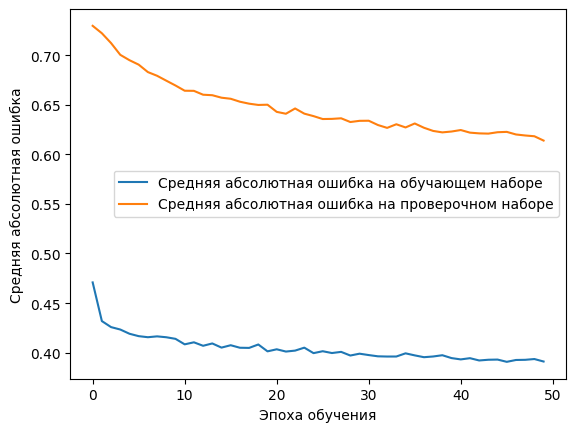

In [57]:
# Обучение модели на простых данных с нормализованной зарплатой
model_simple = Sequential()
model_simple.add(BatchNormalization(input_dim=x_train_01.shape[1]))
model_simple.add(Dense(128, activation='relu'))
model_simple.add(Dense(1000, activation='tanh'))
model_simple.add(Dense(100, activation='relu'))
model_simple.add(Dense(1, activation='linear'))

model_simple.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])

history = model_simple.fit(x_train_01,
                    y_train_scaled,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.15,
                    verbose=1)

plot_history(history)